# Mexico Antenna exploration and processing
La idea es

* Catalogar antenas por sus provincias 
* Graficar el mapa de Mexico con sus antennas
* limpiar aquellas que caigan "al agua"
* Catalogar las antenas como pertenecientes o no a regiones del *"Gran Chaco"* mejicano

## definicion utilizada

In [1]:
import pandas as pd; import numpy as np; import os;import random;
pd.set_option('display.max_rows', 300)
from matplotlib import pyplot as plt
%matplotlib inline
import unicodedata

In [3]:
#from mpl_toolkits.basemap import Basemap
import geopandas as gpd;
from geopandas.geoseries import *
import shapely

In [4]:
np.random.seed(2015)

In [5]:
global mapa

In [36]:
input_file = 'mapas/national_estatal.geojson'

In [9]:
mapa = gpd.GeoDataFrame.from_file(input_file)

In [14]:
mapa['NOMBRE'].unique()

array([u'Aguascalientes', u'Baja California', u'Baja California Sur',
       u'Campeche', u'Coahuila de Zaragoza', u'Colima', u'Chiapas',
       u'Chihuahua', u'Distrito Federal', u'Durango', u'Guanajuato',
       u'Guerrero', u'Hidalgo', u'Jalisco', u'Mexico',
       u'Michoacan de Ocampo', u'Morelos', u'Nayarit', u'Nuevo Leon',
       u'Oaxaca', u'Puebla', u'Queretaro', u'Quintana Roo',
       u'San Luis Potosi', u'Sinaloa', u'Sonora', u'Tabasco',
       u'Tamaulipas', u'Tlaxcala', u'Veracruz de Ignacio de la Llave',
       u'Yucatan', u'Zacatecas'], dtype=object)

In [23]:
antenas.shape,antennas.shape

((4464, 5), (4429, 4))

In [24]:
antenas= pd.read_csv('/home/juan/mobility-study/antennas_mexico.csv',sep = "|",header=0,index_col=0)
#chequeo resultados rapido
antenas.head(15)

,LATITUDE,LONGITUDE,STATE,EPIDEMIC
ID,,,,
2797,14.671,-92.372,Chiapas,1
3060,14.682,-92.155,Chiapas,1
3344,14.721,-92.424,Chiapas,1
3487,14.778,-92.179,Chiapas,1
1924,14.786,-92.366,Chiapas,1
1001,14.870,-92.285,Chiapas,1
2914,14.882,-92.265,Chiapas,1
2094,14.888,-92.283,Chiapas,1
2055,14.888,-92.250,Chiapas,1


# Muy importante!
 
Las coordenadas en un mapa se dan en (lat, long) que no corresponden a las coordenadas cartesianas sino a (y,x) con lo cual es importante armar los **Point** con (long,lat), sino imposible comprarar quien esta dentro de que..

In [25]:
subset =  antenas[['LONGITUDE','LATITUDE']]
tuples = [shapely.geometry.Point(x) for x in subset.values] 
global antenas_gpd 
antenas_gpd =  gpd.GeoSeries(tuples)

In [26]:
def preparar_nombre(s):
        #esta linea elimina las tildes espacios puntos y similar"
        sin_tilde = ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))
        limpio = sin_tilde.replace(" ","_").replace(".","")
        #me quedo con el nombre corto de Veracruz
        if limpio == u'Veracruz_de_Ignacio_de_la_Llave':
            limpio = u'Veracruz'
        return limpio

In [27]:
mapa['NOMBRE'] = mapa['NOMBRE'].apply(lambda s: preparar_nombre(s))

In [28]:
def get_epidemic_state(estado):
    sol=0
    epidemicos =  [u'Jalisco', u'Oaxaca', u'Puebla', u'Queretaro',u'Veracruz', u'Guerrero',u'Morelos', \
                     u'Nayarit',u'Yucatan',u'Chiapas',u'Tabasco',u'Hidalgo']
    if estado in epidemicos:
        sol =1
    return sol    

In [29]:
mapa['EPIDEMIC']=mapa['NOMBRE'].apply(lambda k: get_epidemic_state(k))

In [30]:
mapa.shape

(32, 161)

In [31]:
mapa.head()

,CVEGEO,NOMBRE,OID,POB1,POB10,POB10_R,POB11,POB11_R,POB12,POB12_R,...,POB8,POB80,POB80_R,POB81,POB81_R,POB8_R,POB9,POB9_R,geometry,EPIDEMIC
0,01,Aguascalientes,1,1184996,227733,19.2,321337,27.1,746380,63.0,...,374237,27477,4.8,17582,3.0,31.6,74156,6.3,"POLYGON ((-102.287865181776 22.41649003941674,...",0
1,02,Baja_California,2,3155070,585674,18.6,851102,27.0,2075134,65.8,...,901886,65653,4.1,40567,2.5,28.6,179165,5.7,(POLYGON ((-112.663839812965 28.41882990629272...,0
2,03,Baja_California_Sur,3,637026,116403,18.3,173928,27.3,421998,66.2,...,178472,13323,4.1,8098,2.5,28.0,34715,5.4,(POLYGON ((-109.8946081395473 22.8748229076171...,0
3,04,Campeche,4,822441,159308,19.4,227505,27.7,533014,64.8,...,236538,23517,5.8,15922,3.9,28.8,50917,6.2,"(POLYGON ((-90.379356996781 20.84832728852915,...",0
4,05,Coahuila_de_Zaragoza,5,2748391,492074,17.9,702310,25.6,1756839,63.9,...,797175,73690,5.4,46863,3.4,29.0,160612,5.8,POLYGON ((-102.3107926469074 29.87694857356026...,0


In [32]:
len(antenas_gpd)

4429

In [62]:
#la dupla de figsize se mide en pulgadas
fig = plt.figure(num=1,figsize=(6,6),dpi=200,facecolor='w',edgecolor='b')

In [66]:
del fig

In [33]:
from geopandas.plotting import plot_multipolygon

In [38]:
mapa.to_file?

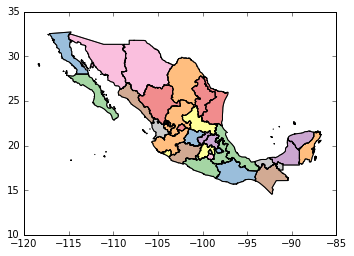

In [34]:
mexico_plot = mapa.geometry.plot()

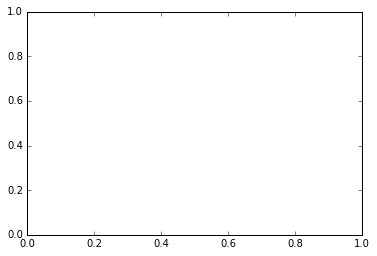

In [96]:
ax= plt.gca()

In [104]:
poly = mapa[mapa.NOMBRE == "Veracruz"]
plot_multipolygon(mexico_plot, poly.geometry.iloc[0], facecolor="#000000")

In [121]:
mapa['geometry'].total_bounds

(-118.40764955087901,
 14.532098361948284,
 -86.710405270056683,
 32.718653575262067)

In [123]:
a=2

In [51]:
epidemicos =  [u'Jalisco', u'Oaxaca', u'Puebla', u'Queretaro',u'Veracruz', u'Guerrero',u'Morelos', \
                     u'Nayarit',u'Yucatan',u'Chiapas',u'Tabasco',u'Hidalgo']
epidemicos_dict={u'Jalisco':12, u'Oaxaca':19, u'Puebla':20, u'Queretaro':21,u'Veracruz':29, \
        u'Guerrero':11,u'Morelos':16, u'Nayarit':17,u'Yucatan':30,u'Chiapas':6,u'Tabasco':26,u'Hidalgo':12}

In [56]:
mexico_plot.patches[29].set_color("#33ccff")

Unrecognized scheme:  Quantile
Using Quantiles instead


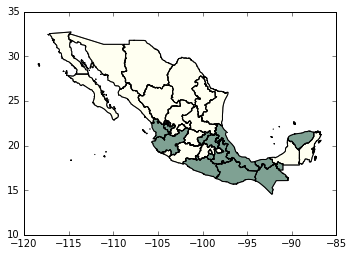

In [128]:
kw = dict(column="EPIDEMIC",k=6,colormap='YlGn')
mapa.plot(scheme = "Quantile",**kw)